# Label Propagation Metrics

/private/home/apratik/.conda/envs/locobot_env/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


Accuracy 12077.538360595703, over 8130 frames
Display highest 5 MSE segm maps ... 


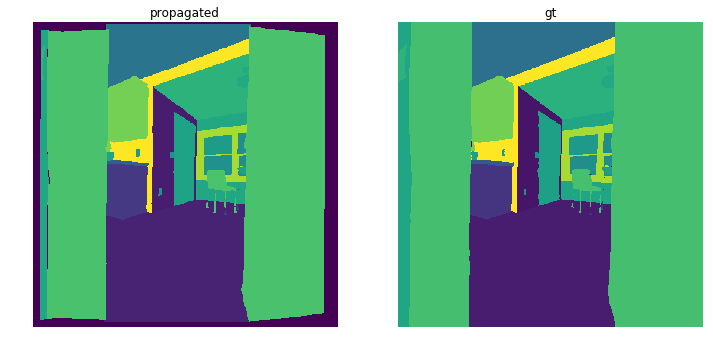

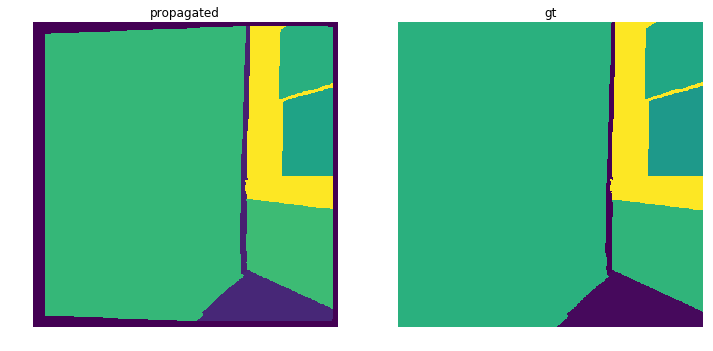

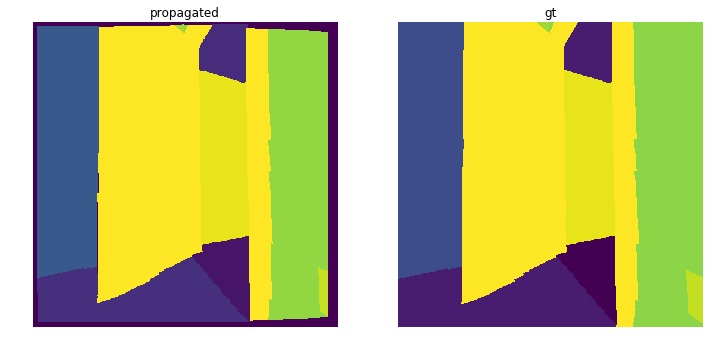

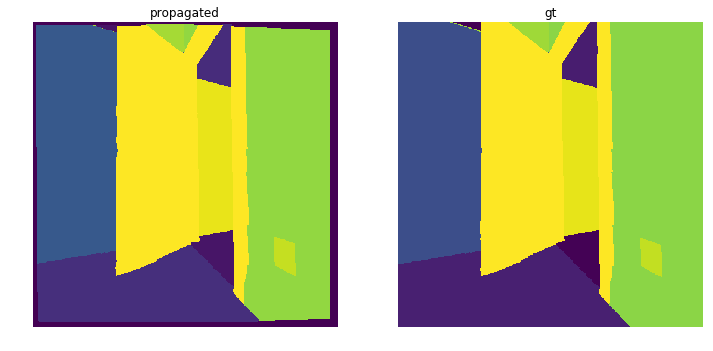

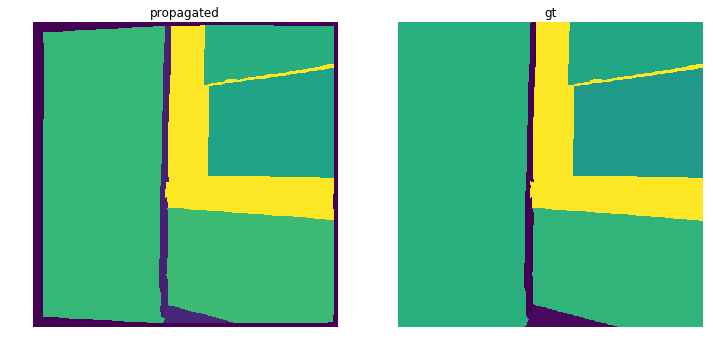

In [1]:

# Take in *.npy propagated and GT label maps

gt_seg_dir = '/checkpoint/apratik/ActiveVision/active_vision/replica_random_exploration_data/apartment_0/seg'
out_npy_dir = '/checkpoint/apratik/ActiveVision/active_vision/replica_random_exploration_data/apartment_0/pred_label_fr5_p2'

import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

prop_seg = os.listdir(out_npy_dir)
mse = {}
cnt = 0
for x in prop_seg:
    img = int(x.split('.')[0])
    cnt += 1
    prop_data = np.load(os.path.join(out_npy_dir, x)).astype(np.uint8)
    gt_data = np.load(os.path.join(gt_seg_dir, x)).astype(np.uint8)
    mse[img] = (np.square(prop_data-gt_data)).mean(axis=None)

print("Accuracy {}, over {} frames".format(sum(mse.values()), cnt))

print("Display highest 5 MSE segm maps ... ")
for k, v in sorted(mse.items(), key = lambda item: item[1], reverse=True)[:5]:
    filename = "{:05d}.npy".format(k)
    prop_data = np.load(os.path.join(out_npy_dir, filename)).astype(np.uint8)
    gt_data = np.load(os.path.join(gt_seg_dir, filename)).astype(np.uint8)
    
    plt.figure(figsize=(12 , 8))
    ax = plt.subplot(1, 2, 1)
    ax.axis('off')
    ax.set_title('propagated')
    plt.imshow(prop_data)

    ax = plt.subplot(1, 2, 2)
    ax.axis('off')
    ax.set_title("gt")
    plt.imshow(gt_data)

    plt.show()        
